1. Building the TF-IDF matrix.
Following the steps in Project 1, transform the documents into TF-IDF vectors.
Use min_df = 3, exclude the stopwords (no need to do stemming or lemmatization).
QUESTION 1: Report the dimensions of the TF-IDF matrix you get.

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
np.random.seed(42)

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
# separate all data into two classes
labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0

# process data
def trim_data(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(temp[j])           
        data_list[i] = " ".join(ans)
        
trim_data(dataset.data)

# generate TF-IDF matrix
vectorizer = TfidfVectorizer(min_df=3, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(dataset.data)
print(X.shape)

(7882, 23135)


2. Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random_state, max_iter and n_init. Please use random_state=0, max_iter > 1000 and n_init > 30. Compare the clustering results with the known class labels. (you can refer to sklearn - Clustering text documents using k-means for a basic work flow)


(a) Given the clustering result and ground truth labels, contingency table A is the matrix whose entries Aij is the number of data points that belong to both the class Ci the cluster Kj .

QUESTION 2: Report the contingency table of your clustering result.

In [3]:
import matplotlib.pyplot as plt
def plot_contingency_table(cm, title, actual_class_names, cluster_class_names):
    plt.imshow(cm, interpolation='nearest', cmap='GnBu')
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(actual_class_names))
    plt.xticks(tick_marks, actual_class_names)
    plt.yticks(tick_marks, cluster_class_names)
    
    plt.ylabel('Cluster Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.savefig(title+'.png')


In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix

# K-Means Clustering
km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

contingency table:


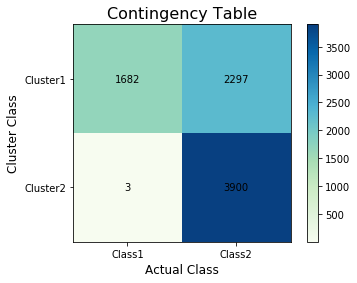

()


In [5]:
# Print results
contingency = contingency_matrix(labels, km.labels_)

print('contingency table:')
plt.figure()
title = 'Contingency Table'
plot_contingency_table(contingency, title, ["Class1", "Class2"], ['Cluster1', 'Cluster2'])
plt.show()
print()

b)In order to evaluate clustering results, there are various measures for a given partition of the data points with respect to the ground truth. We will use the measures homogeneity score, completeness score, V-measure, adjusted Rand score and adjusted mutual info score, all of which can be calculated by the corresponding functions provided in
sklearn.metrics

QUESTION 3:
Report the 5 measures above for the K-means clustering results you get.

In [6]:
print('Homogeneity:', metrics.homogeneity_score(labels, km.labels_))
print('Completeness:', metrics.completeness_score(labels, km.labels_)) 
print('V-measure:', metrics.v_measure_score(labels, km.labels_)) 
print('Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km.labels_)) 
print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km.labels_)) 

('Homogeneity:', 0.2480861826246507)
('Completeness:', 0.3313589810284791)
('V-measure:', 0.28373896215987654)
('Adjusted Rand Score:', 0.17328640818785399)
('Adjusted Mutual Info Score:', 0.24801733618150645)


In [7]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)
X_svd = svd.fit_transform(X)

V = svd.components_

QUESTION 4: Report the plot of the percent of variance the top r principle compo- nents can retain v.s. r, for r = 1 to 1000.

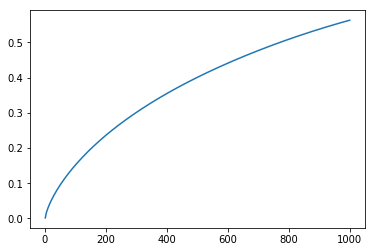

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1,1001), svd.explained_variance_.cumsum())  

QUESTION 5:
Let r be the dimension that we want to reduce the data to (i.e. n_components).
Try r = 1,2,3,5,10,20,50,100,300, and plot the 5 measure scores v.s. r for both
SVD and NMF.
Report the best r choice for SVD and NMF respectively.

In [14]:
from sklearn.decomposition import TruncatedSVD

component_size = 1

svd = TruncatedSVD(n_components=component_size)
X1_svd = svd.fit_transform(X)

km1 = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
km1.fit(X1_svd)

print('Homogeneity:', metrics.homogeneity_score(labels, km1.labels_))
print('Completeness:', metrics.completeness_score(labels, km1.labels_)) 
print('V-measure:', metrics.v_measure_score(labels, km1.labels_)) 
print('Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km1.labels_)) 
print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km1.labels_)) 

('Homogeneity:', 0.0003334746809434936)
('Completeness:', 0.00033770579251001155)
('V-measure:', 0.0003355769002950503)
('Adjusted Rand Score:', 0.0003837594961438892)
('Adjusted Mutual Info Score:', 0.00024195452056117046)


In [22]:
from sklearn.decomposition import TruncatedSVD

def get_svd_kmeans(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return km

def get_homogeneity_score(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return metrics.homogeneity_score(labels, km.labels_)

def get_completeness(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return metrics.completeness_score(labels, km.labels_)

def get_vmeasure(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return metrics.v_measure_score(labels, km.labels_)

def get_adjusted_rand_score(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return metrics.adjusted_rand_score(labels, km.labels_)

def get_adjusted_mutual_info_score(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return metrics.adjusted_mutual_info_score(labels, km.labels_)    

In [28]:
x = [1,2,3,5,10,20,50,100,300]
y_kmeans = [get_nmf_kmeans(i) for i in x]

In [29]:
# y_homogeneity = [get_homogeneity_score(i) for i in x]
y_homogeneity = [metrics.homogeneity_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_homogeneity))

In [31]:
# y_completeness = [get_completeness(i) for i in x]
y_completeness = [metrics.completeness_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_completeness))

In [32]:
# y_adjusted_rand = [get_adjusted_rand_score(i) for i in x]
y_vmeasure = [metrics.v_measure_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_vmeasure))

In [33]:
# y_vmeasure = [get_vmeasure(i) for i in x]
y_adjusted_rand = [metrics.adjusted_rand_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_adjusted_rand))

In [34]:
# y_adjusted_mutual_info_score = [get_adjusted_mutual_info_score(i) for i in x]
y_adjusted_mutual_info_score = [metrics.adjusted_mutual_info_score(labels,km.labels_) for km in y_kmeans]
print(zip(x,y_adjusted_mutual_info_score))

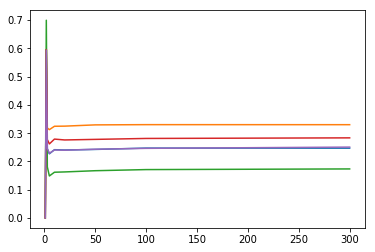

In [35]:
plt.plot(x,y_homogeneity)
plt.plot(x,y_completeness)
plt.plot(x,y_adjusted_rand)
plt.plot(x,y_vmeasure)
plt.plot(x,y_adjusted_mutual_info_score)

In [56]:
from sklearn.decomposition import NMF

def get_nmf_kmeans(component_size):
    model = NMF(n_components=component_size, init='random', random_state=0)
    W_train = model.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(W_train)
    return km

In [51]:
x = [1,2,3,5,10,20,50,100,300]
y_kmeans = [get_nmf_kmeans(i) for i in x]

In [57]:
y_homogeneity = [metrics.homogeneity_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_homogeneity))

In [58]:
y_completeness = [metrics.completeness_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_completeness))

In [59]:
y_vmeasure = [metrics.v_measure_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_vmeasure))

In [60]:
y_adjusted_rand = [metrics.adjusted_rand_score(labels, km.labels_) for km in y_kmeans]
print(zip(x,y_adjusted_rand))

In [61]:
y_adjusted_mutual_info_score = [metrics.adjusted_mutual_info_score(labels,km.labels_) for km in y_kmeans]
print(zip(x,y_adjusted_mutual_info_score))

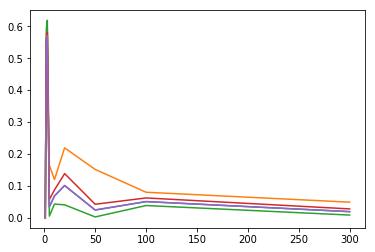

In [62]:
plt.plot(x,y_homogeneity)
plt.plot(x,y_completeness)
plt.plot(x,y_adjusted_rand)
plt.plot(x,y_vmeasure)
plt.plot(x,y_adjusted_mutual_info_score)

QUESTION 11: Repeat the following for 20 categories using the same parameters as in 2-class case:
• Transform corpus to TF-IDF matrix;
• Directly perform K-means and report the 5 measures and the contingency matrix;

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
np.random.seed(42)

new_dataset = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=42)

In [6]:
## Taken from top

import re
from sklearn.feature_extraction.text import TfidfVectorizer

new_labels = [1]*len(new_dataset.data)
for i in range(len(new_dataset.data)):
    new_labels[i] = new_dataset.target[i]
        
# process data
def trim_data(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(temp[j])           
        data_list[i] = " ".join(ans)
        
trim_data(new_dataset.data)

# generate TF-IDF matrix
vectorizer = TfidfVectorizer(min_df=3, stop_words='english', use_idf=True)
new_X = vectorizer.fit_transform(new_dataset.data)
print(new_X.shape)

(18846, 44866)


In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix

# K-Means Clustering
new_km = KMeans(n_clusters=20, n_init=30, max_iter=1000, random_state=0)
new_km.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=20, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
save_object(new_km, "20_categories_default_km")

In [11]:
print('Homogeneity:', metrics.homogeneity_score(new_labels, new_km.labels_))
print('Completeness:', metrics.completeness_score(new_labels, new_km.labels_)) 
print('V-measure:', metrics.v_measure_score(new_labels, new_km.labels_)) 
print('Adjusted Rand Score:', metrics.adjusted_rand_score(new_labels, new_km.labels_)) 
print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(new_labels, new_km.labels_)) 

Homogeneity: 0.2980699220694136
Completeness: 0.381900007248544
V-measure: 0.3348174690991464
Adjusted Rand Score: 0.09451956671612147
Adjusted Mutual Info Score: 0.2957831567082612


/Users/rishabketandoshi/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [ ]:
new_contingency = contingency_matrix(labels, km.labels_)

actual_class_names = ["Class{}".format(i) for i in range(1,21)]
actual_cluster_names = ["Cluster{}".format(i) for i in range(1,21)]

print('contingency table:')
plt.figure()
title = 'Contingency Table-20 Categories'
plot_contingency_table(new_contingency, title, actual_class_names, actual_cluster_names)
plt.show()
print()

QUESTION 12: Try different dimensions for both truncated SVD and NMF dimensionality reduction techniques and the different transformations of the obtained feature vectors as outlined in above parts.

You don’t need to report everything you tried, which will be tediously long. You are asked, however, to report your best combination, and quantitatively report how much better it is compared to other combinations. You should also include typical combinations showing what choices are desirable (or undesirable).

In [ ]:
def get_new_svd_kmeans(component_size):
    svd = TruncatedSVD(n_components=component_size)
    Xn_svd = svd.fit_transform(X)
    km = KMeans(n_clusters=20, n_init=30, max_iter=1000, random_state=0)
    km.fit(Xn_svd)
    return km

def get_new_nmf_kmeans(component_size):
    model = NMF(n_components=component_size, init='random', random_state=0)
    W_train = model.fit_transform(X)
    km = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0)
    km.fit(W_train)
    return km

In [ ]:
# Truncated SVD:
x = [1,2,3,5,10,20,50,100,300]
y_kmeans = [get_new_nmf_kmeans(i) for i in x]

In [9]:
import pickle

def save_object(data,fileName):
    with open(fileName+".pickle", 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
        
def load_object(fileName):
    with open(fileName+'.pickle', 'rb') as f:
        data = pickle.load(f)
        return data